In [1]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import read_cs_files as cs

In [2]:
def load_data(fname):
    # ... LOADING DATA FROM TOB FORMAT TO 10HZ
    # bin_data include 2 + N columns:
    # - The first column is the TIMESTAMP meta[2][0]
    # - The second column is the RECORD ID meta[2][1]
    # - Columns 3 to N+2 is the data with headers correspond to meta[2][2:-1]
    bin_data, meta = cs.read_cs_files(fname)
    
    # ... CONVERT DATA TO PANDAS FORMAT 
    df = pd.DataFrame(columns=meta[2], data=None)

    # Convert timestamp to datetimea:
    df['TIMESTAMP'] = pd.to_datetime(bin_data[0])

    # Copy the remaining data to dataframe
    for i, col in enumerate(meta[2][1:]):
        df[col] = bin_data[i + 1]    
        
    # Average the data into 30 minute frequency
    df_30min = df.resample('30T', on='TIMESTAMP').mean()
    df_30min.reset_index(inplace=True)
    
    df_1min = df.resample('1T', on='TIMESTAMP').mean()
    df_1min.reset_index(inplace=True)
    return df_30min, df_1min, df, meta

In [3]:
# filenames = sorted(glob.glob('ts_data*.dat'))
df_30min_all = pd.DataFrame()
df_1min_all = pd.DataFrame()
df_all = pd.DataFrame()
n0 = 0
n1 = 75
for i in range(n0,n1,1):
    fn = f'/Users/pvn/Downloads/Download-2025-08-25/ts_data{i}.dat'
    print(f'Processing file {i+1} of {n1-n0+1}: {fn}')
    df_30min, df_1min, df, meta = load_data(fn)
    df_30min_all = pd.concat([df_30min_all, df_30min], ignore_index=True)
    df_1min_all = pd.concat([df_1min_all, df_1min], ignore_index=True)
    df_all = pd.concat([df_all, df], ignore_index=True)

Processing file 1 of 76: /Users/pvn/Downloads/Download-2025-08-25/ts_data0.dat
Processing file 2 of 76: /Users/pvn/Downloads/Download-2025-08-25/ts_data1.dat
Processing file 3 of 76: /Users/pvn/Downloads/Download-2025-08-25/ts_data2.dat
Processing file 4 of 76: /Users/pvn/Downloads/Download-2025-08-25/ts_data3.dat
Processing file 5 of 76: /Users/pvn/Downloads/Download-2025-08-25/ts_data4.dat
Processing file 6 of 76: /Users/pvn/Downloads/Download-2025-08-25/ts_data5.dat
Processing file 7 of 76: /Users/pvn/Downloads/Download-2025-08-25/ts_data6.dat
Processing file 8 of 76: /Users/pvn/Downloads/Download-2025-08-25/ts_data7.dat
Processing file 9 of 76: /Users/pvn/Downloads/Download-2025-08-25/ts_data8.dat
Processing file 10 of 76: /Users/pvn/Downloads/Download-2025-08-25/ts_data9.dat
Processing file 11 of 76: /Users/pvn/Downloads/Download-2025-08-25/ts_data10.dat
Processing file 12 of 76: /Users/pvn/Downloads/Download-2025-08-25/ts_data11.dat
Processing file 13 of 76: /Users/pvn/Downloads/

In [4]:
colors = [
    "#4e79a7",  # deep blue
    "#f28e2b",  # vivid orange
    "#59a14f",  # fresh green
    "#e15759",  # bright red
    "#76b7b2",  # teal
    "#edc949",  # yellow
    "#af7aa1",  # muted purple
    "#ff9da7"   # soft pink
]

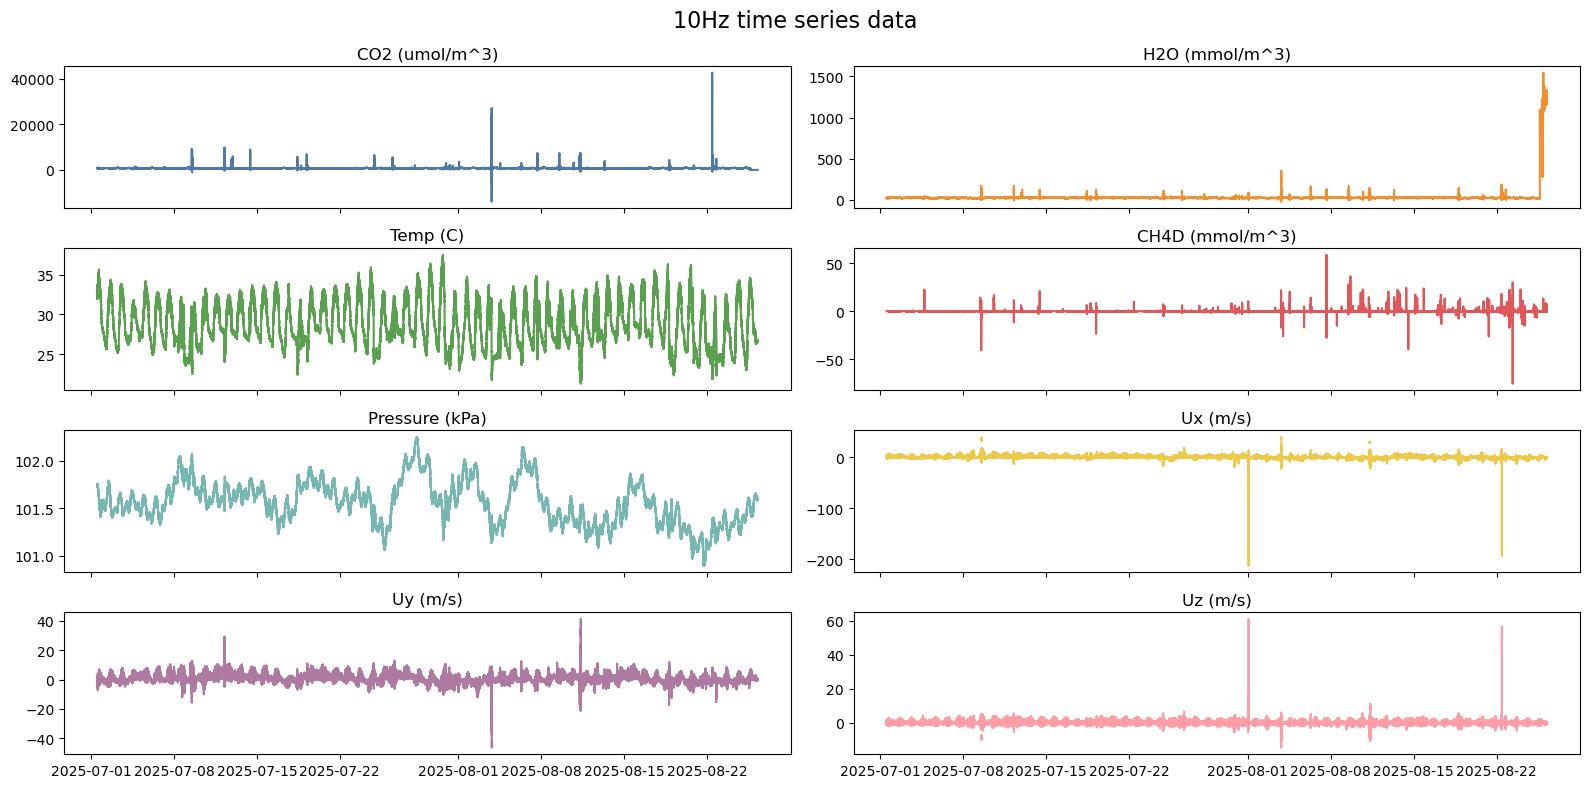

In [5]:
# import ipympl
names = meta[2]
units = meta[3]
vars = ['CO2', 'H2O', 'Temp', 'CH4D', 'Pressure', 'Ux', 'Uy', 'Uz']
fig, ax = plt.subplots(4, 2, figsize=(16,8), sharex=True)

for k, var in enumerate(vars):
    ind = names.index(var)
    label = f'{var} ({units[ind]})'
    m = k // 2
    n = k % 2
    ax[m,n].plot(df_all['TIMESTAMP'], df_all[var], colors[k])
    ax[m,n].set_title(label)
plt.suptitle('10Hz time series data', fontsize=16)
plt.tight_layout()
# plt.savefig('TS_data.png', dpi=600, bbox_inches='tight')

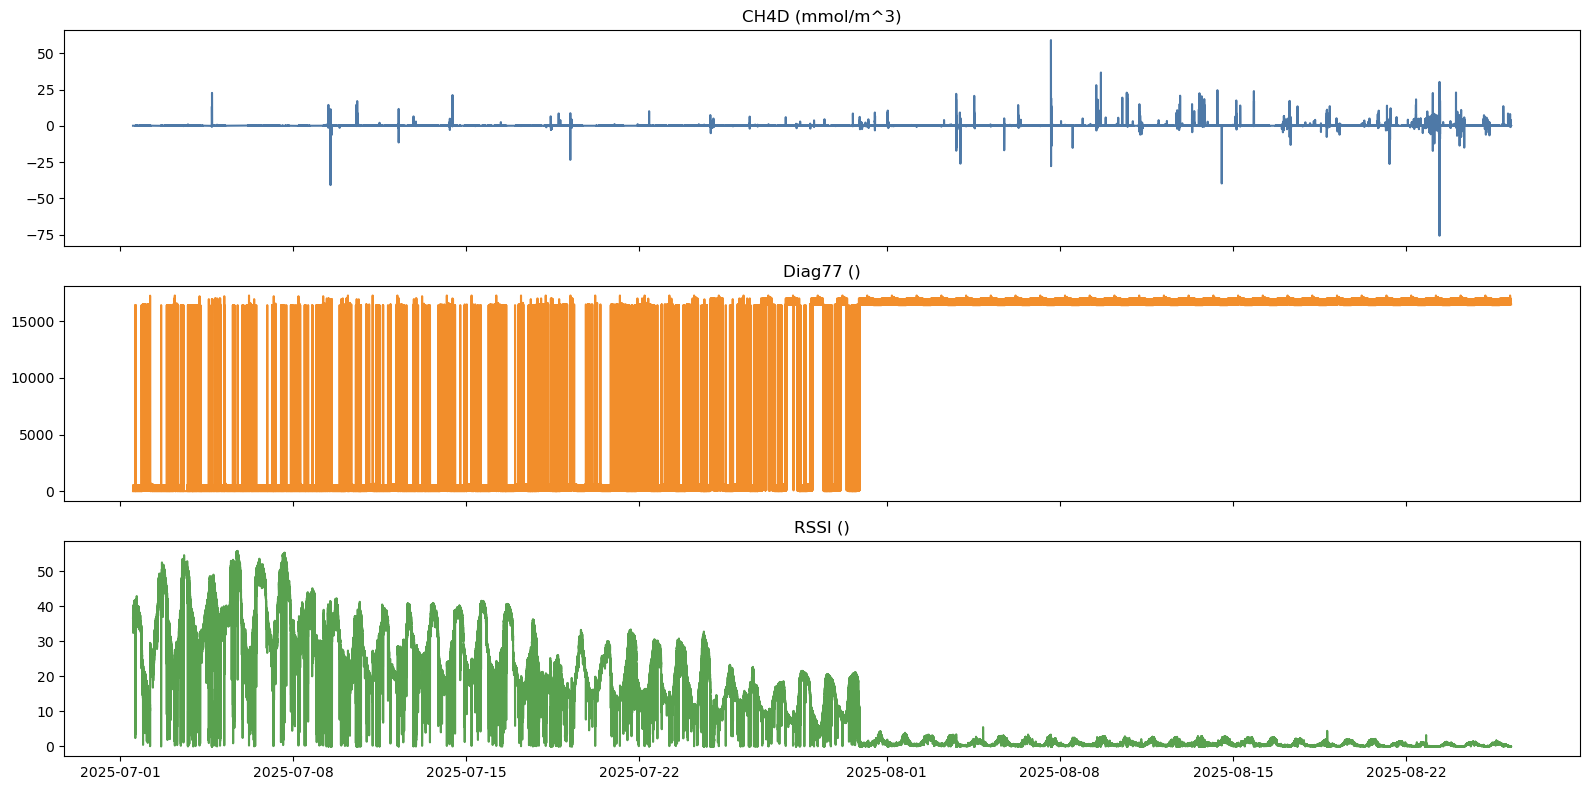

In [7]:
# import ipympl
names = meta[2]
units = meta[3]
vars = ['CH4D', 'Diag77', 'RSSI']
fig, ax = plt.subplots(3, 1, figsize=(16,8), sharex=True)

for k, var in enumerate(vars):
    ind = names.index(var)
    label = f'{var} ({units[ind]})'
    # m = k // 2
    # n = k % 2
    ax[k].plot(df_all['TIMESTAMP'], df_all[var], colors[k])
    ax[k].set_title(label)
# plt.suptitle('10Hz time series data', fontsize=16)
plt.tight_layout()
# plt.savefig('TS_data.png', dpi=600, bbox_inches='tight')

In [6]:
df_all.columns

Index(['TIMESTAMP', 'RECORD', 'Ux', 'Uy', 'Uz', 'SonicTemp', 'SonicDiag',
       'CO2', 'H2O', 'irga(3)', 'irga_diag', 'CH4D', 'Pressure', 'Temp',
       'Diag77', 'RSSI'],
      dtype='object')

In [106]:
filename = '/Users/pvn/Downloads/eddypro_1_full_output_2025-08-28T112042_adv.csv'
df2 = pd.read_csv(filename, skiprows=4, header=None)

In [107]:
with open(filename, "r", encoding="latin-1") as f:
    meta_lines = [next(f) for _ in range(3)]  # header lines

In [108]:
columns =  meta_lines[1].strip().split(',')
columns = [c.strip('"') for c in columns]
df2.columns = columns
df2["datetime"] = pd.to_datetime(df2["date"] + " " + df2["time"])

units =  meta_lines[2].strip().split(',')
units = [u.strip('"') for u in units]


In [114]:
vars = ['LE', 'H', 'co2_flux', 'h2o_flux', 'ch4_flux']
colors = [
    "#4e79a7",  # deep blue
    "#f28e2b",  # vivid orange
    "#59a14f",  # fresh green
    "#e15759",  # bright red
    "#76b7b2",  # teal
    "#edc949",  # yellow
    "#af7aa1",  # muted purple
    "#ff9da7"   # soft pink
]

/var/folders/5t/zy7vw0s50pdbmspg54cwyj1mqbzrzg/T/ipykernel_71806/1095305088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data == -9999] = np.nan


Text(0.5, 0, 'Time')

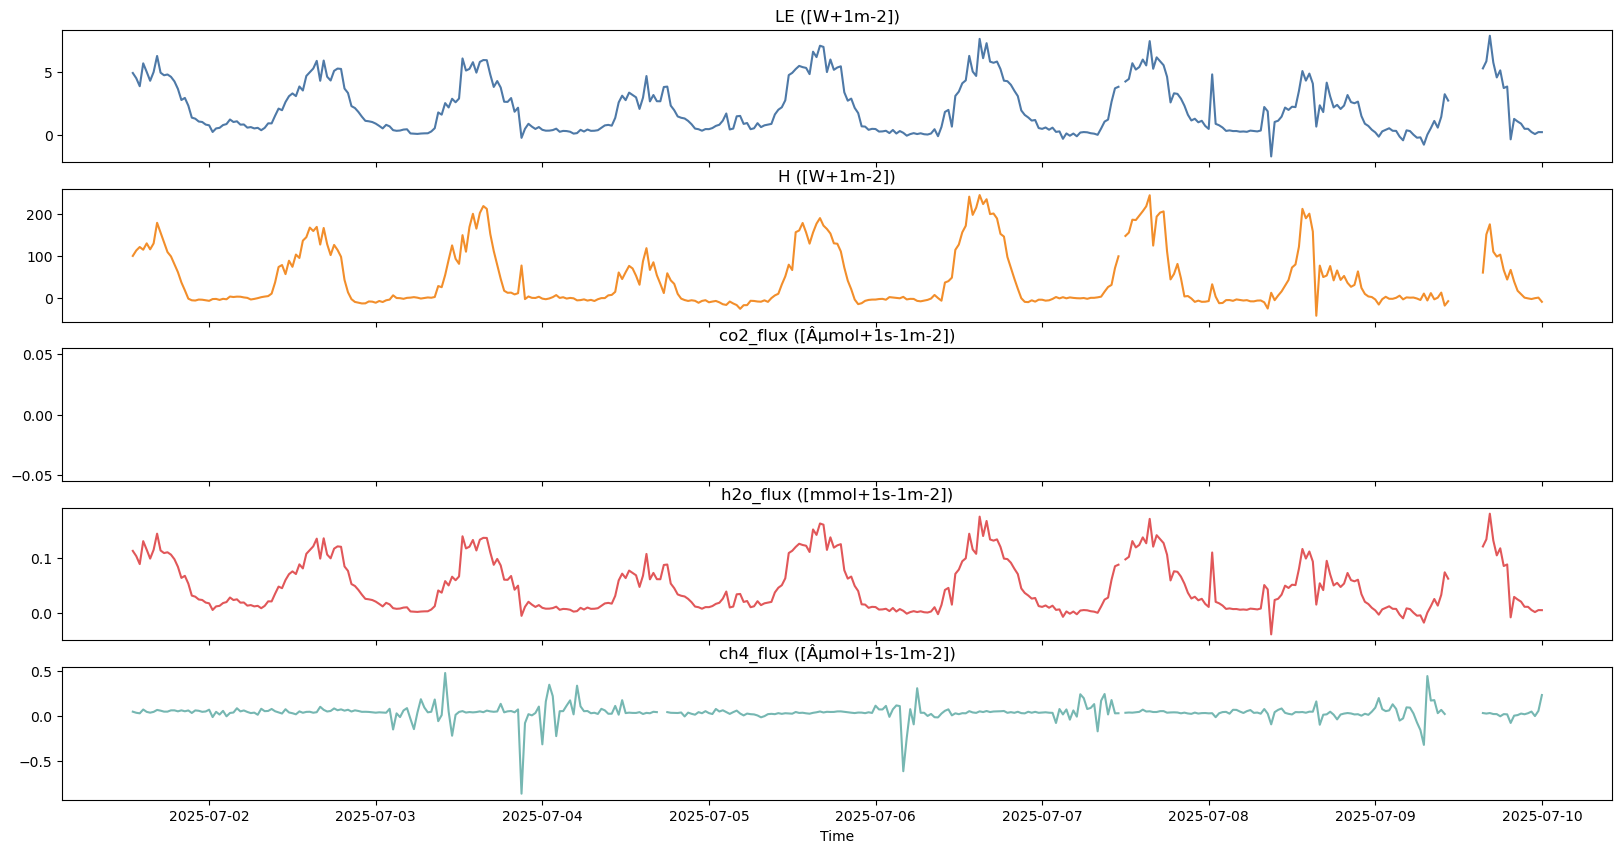

In [115]:
fig, ax = plt.subplots(len(vars), 1, figsize=(20, 2*len(vars)), sharex=True)
for k, var in enumerate(vars):
    u = units[columns.index(var)]
    data = df2[var]
    data[data == -9999] = np.nan
    ax[k].plot(df2['datetime'], data, colors[k])
    ax[k].set_title(f'{var} ({u})')
    # ax[k].set_title(f'Time series of {var}')
plt.xlabel('Time')